In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer


In [91]:
df=pd.read_csv('framingham.csv')

In [92]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [93]:
df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [94]:
df.shape

(4238, 16)

In [95]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [96]:
df['education'].value_counts()

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

In [97]:
df.drop(columns = 'education', inplace = True)

In [98]:
df['TenYearCHD'].value_counts()


0    3594
1     644
Name: TenYearCHD, dtype: int64

In [99]:
#filled missing values in 'cigsPerDay' column with 0
df['cigsPerDay'].fillna(value=0.0,inplace=True)

In [100]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

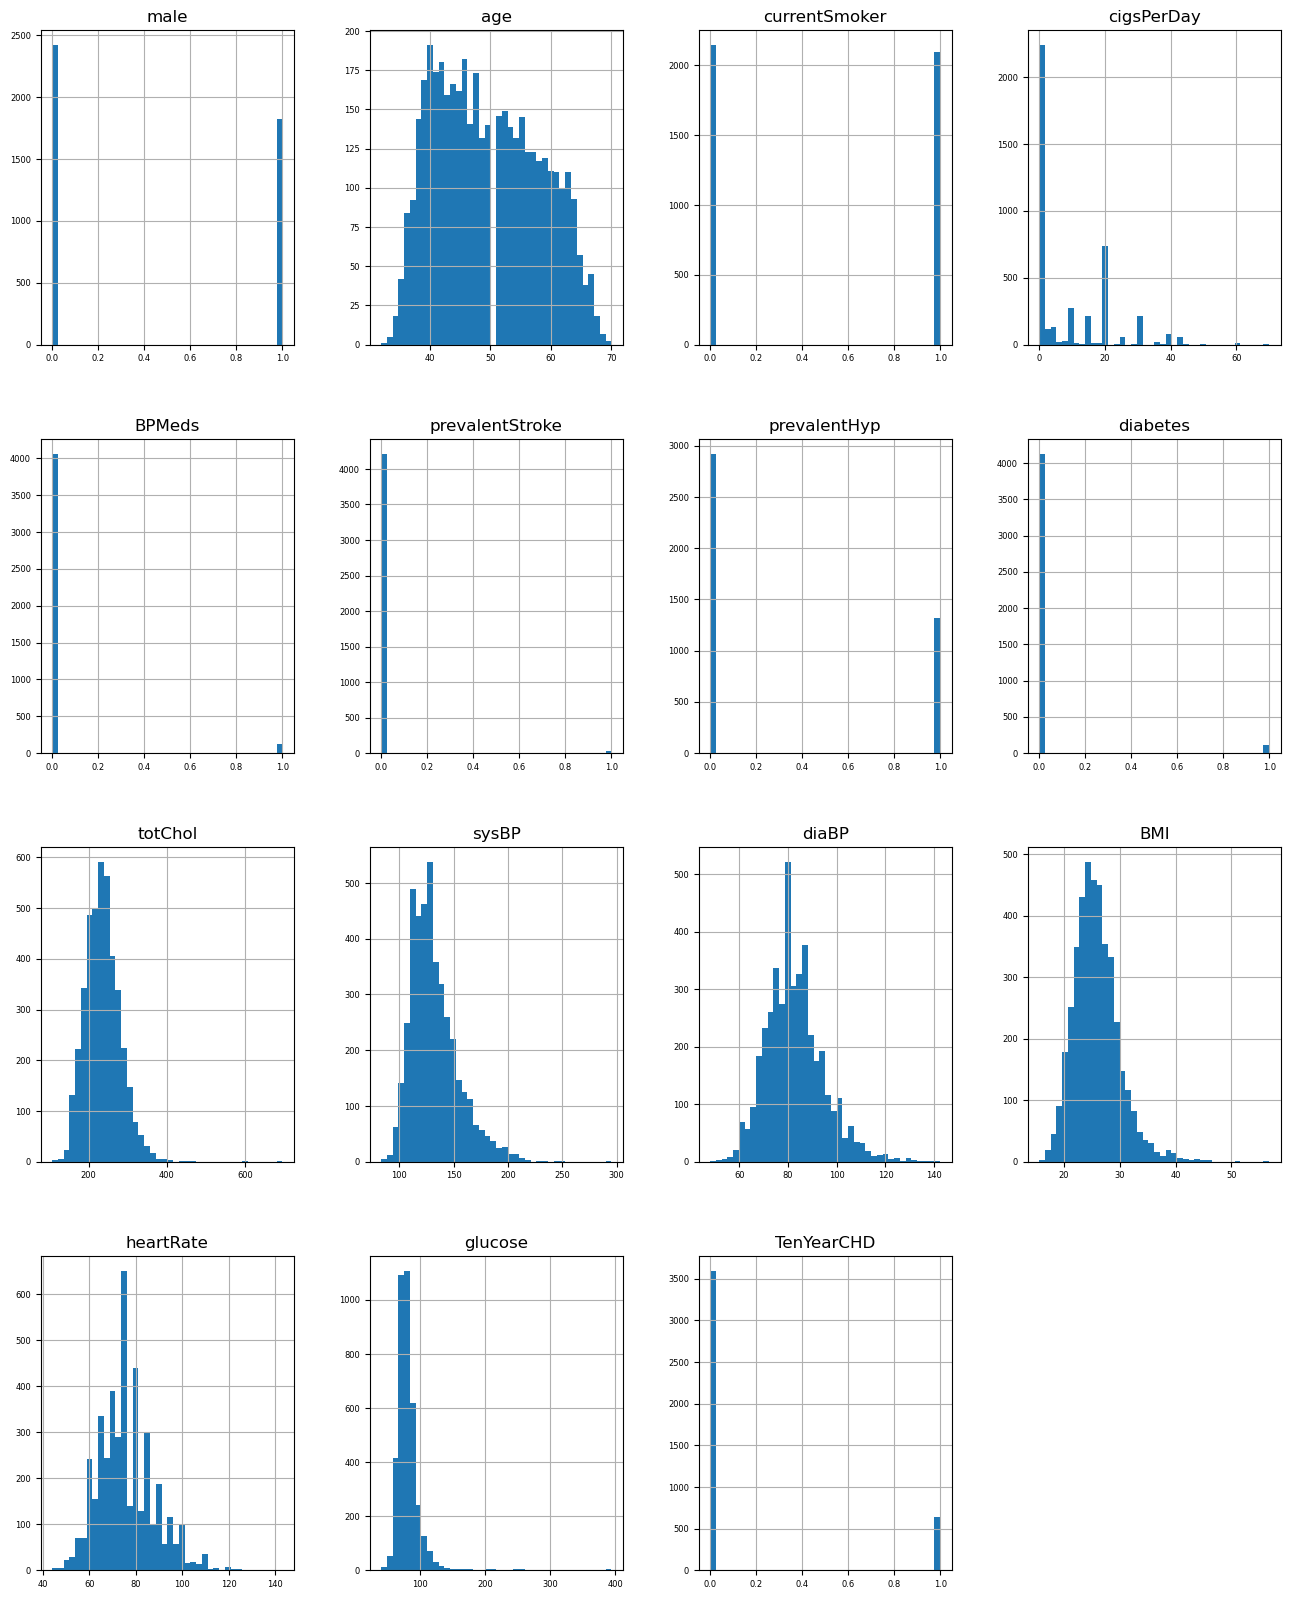

In [101]:
df.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6);

<AxesSubplot: >

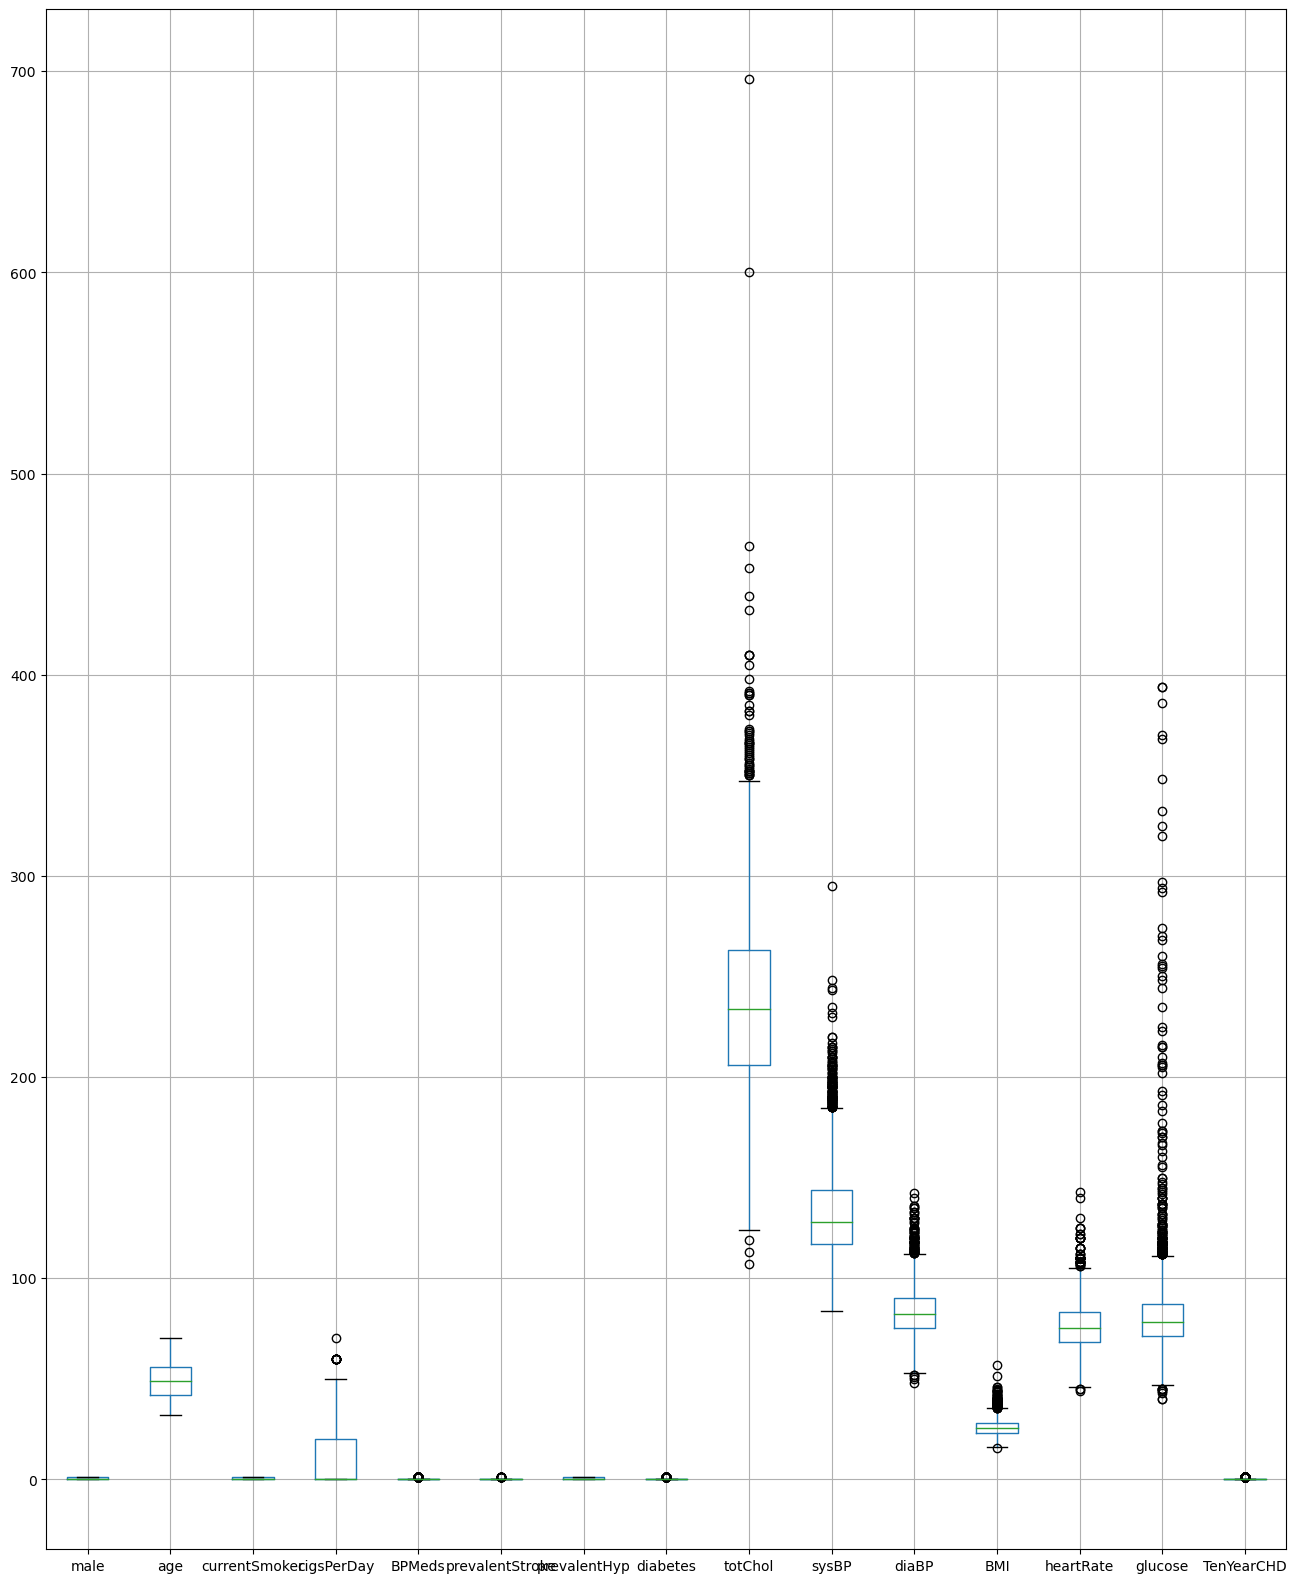

In [102]:
df.boxplot(figsize=(16, 20))

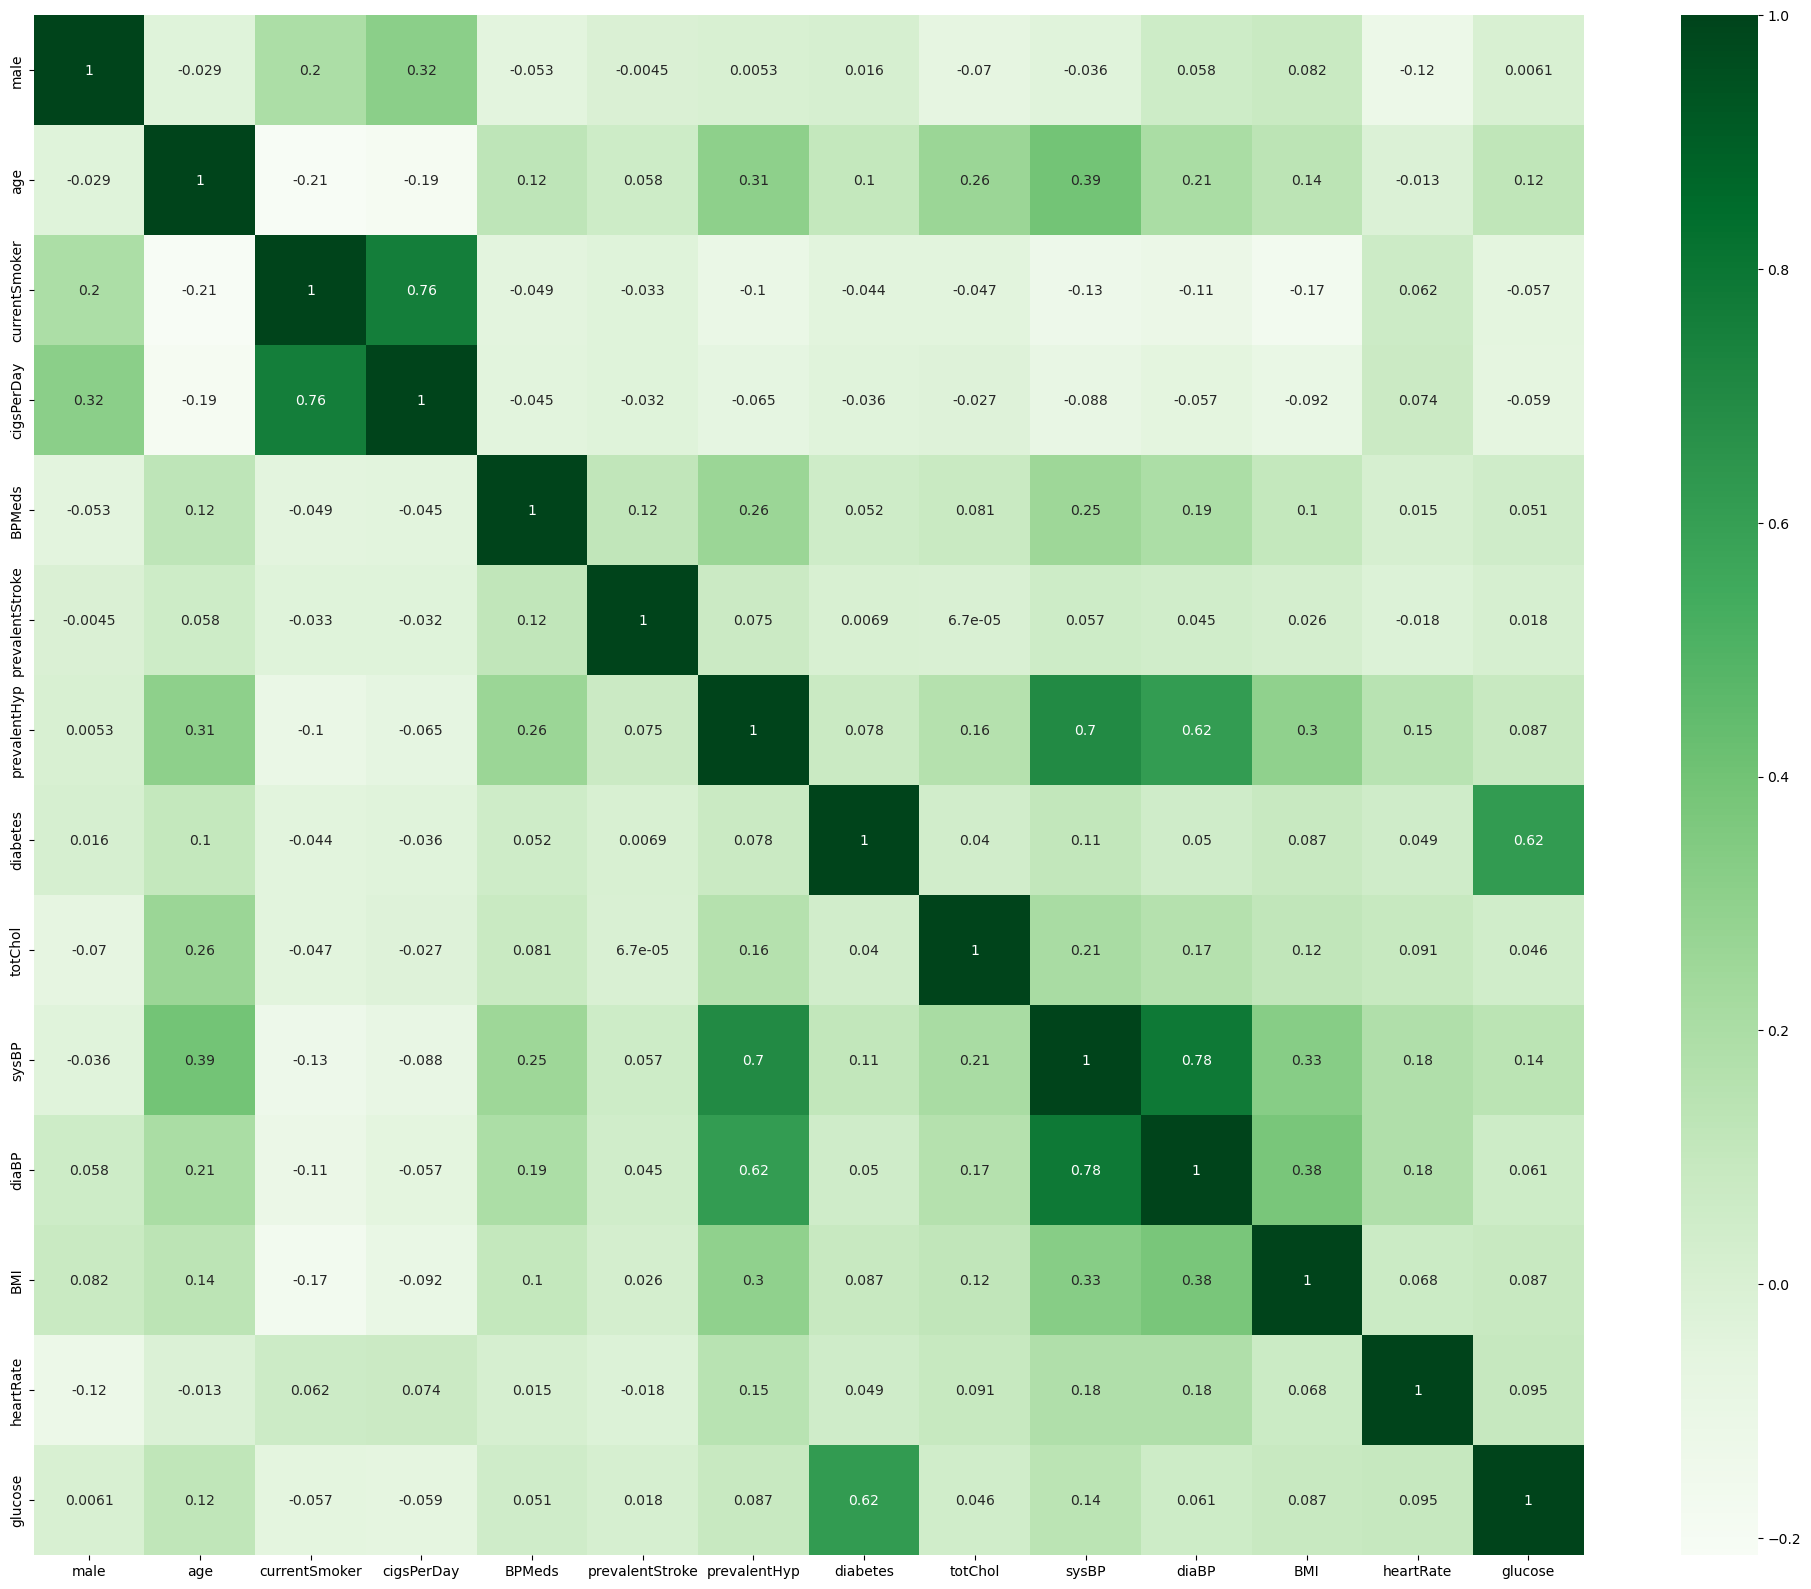

In [103]:
corr = df.drop(columns= 'TenYearCHD').corr()
fig , ax = plt.subplots(figsize=(25 , 20))
sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Greens');

In [104]:
df.dropna(inplace=True)
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3019, 14)
y_train shape: (3019,)
X_test shape: (755, 14)
y_test shape: (755,)


In [105]:
regressor=LogisticRegression()
regressor.fit(X_train,y_train)
# get predictions for training and testing data
y_training_pred = regressor.predict(X_train)
y_testing_pred = regressor.predict(X_test)

#get accuracy for training and testing
training_acc = accuracy_score(y_train, y_training_pred)
testing_acc = accuracy_score(y_test, y_testing_pred)

print(f"Training accuracy : {training_acc: .4f}")
print(f"Testing accuracy : {testing_acc: .4f}")

Training accuracy :  0.8529
Testing accuracy :  0.8318


In [106]:
print(confusion_matrix(y_testing_pred,y_test))
print(accuracy_score(y_testing_pred,y_test))
print(classification_report(y_testing_pred,y_test))

[[625 123]
 [  4   3]]
0.8317880794701987
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       748
           1       0.02      0.43      0.05         7

    accuracy                           0.83       755
   macro avg       0.51      0.63      0.48       755
weighted avg       0.98      0.83      0.90       755



In [107]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [108]:
parameters={'penalty':('l1','l2','elasticnet',None),'C':[1,10,20]}

In [109]:
clf=GridSearchCV(regressor,param_grid=parameters,cv=5,scoring='accuracy')

In [110]:
## Splitting of Train data to validation data
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20],
                         'penalty': ('l1', 'l2', 'elasticnet', None)},
             scoring='accuracy')

In [111]:
clf.best_params_

{'C': 1, 'penalty': 'l2'}

In [112]:
regressor=LogisticRegression(C=1,penalty='l2')
regressor.fit(X_train,y_train)
# get predictions for training and testing data
y_training_pred = regressor.predict(X_train)
y_testing_pred = regressor.predict(X_test)

#get accuracy for training and testing
training_acc = accuracy_score(y_train, y_training_pred)
testing_acc = accuracy_score(y_test, y_testing_pred)

print(f"Training accuracy : {training_acc: .4f}")
print(f"Testing accuracy : {testing_acc: .4f}")

Training accuracy :  0.8529
Testing accuracy :  0.8318


In [113]:
y_test

102     0
4233    1
2976    0
1491    0
398     1
       ..
1876    0
1444    0
4035    1
3245    0
3984    0
Name: TenYearCHD, Length: 755, dtype: int64

In [117]:
training_acc = accuracy_score(y_train,regressor.predict(X_train))

In [118]:
training_acc

0.8529314342497516

In [119]:
import pickle as pkl


In [122]:
pkl.dump(regressor,open('regressor.pkl','wb'))